# Seaborn: FacetGrid

In [3]:
import seaborn as sns

from matplotlib import pyplot as plt

In [4]:
penguins = sns.load_dataset('penguins')

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Intro Visuals

In [33]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

In [7]:
sns.set_style('white')

In [8]:
pen_ex = penguins[penguins.species.isin(['Adelie', 'Chinstrap'])]

In [9]:
pen_ex.body_mass_g.describe()

count     219.000000
mean     3710.730594
std       436.250355
min      2700.000000
25%      3400.000000
50%      3700.000000
75%      3987.500000
max      4800.000000
Name: body_mass_g, dtype: float64

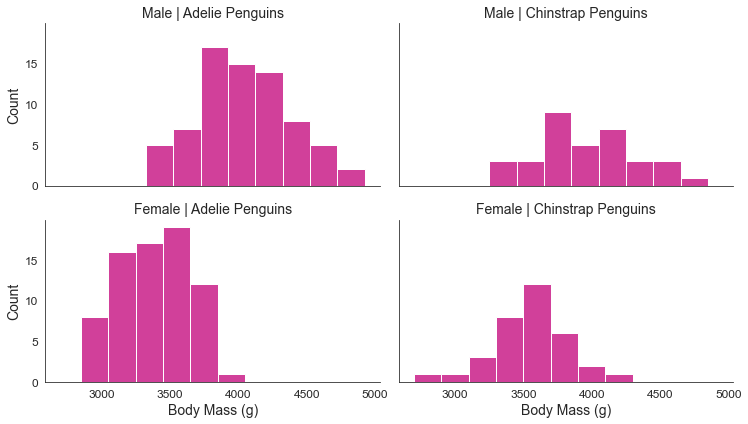

In [10]:
g = sns.FacetGrid(pen_ex, row='sex', col='species', aspect=1.75)
g.map_dataframe(sns.histplot, x='body_mass_g', binwidth=200, color='xkcd:magenta')  
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins')
g.set_axis_labels('Body Mass (g)', "Count")

plt.tight_layout()
#plt.savefig('15facetgrid_thumb.png', dpi=200);

In [11]:
plt.rc('xtick', labelsize=10)  # more info  https://www.geeksforgeeks.org/matplotlib-pyplot-rc-in-python/ 
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)  

## Basics

In [12]:
sns.set_style('white')

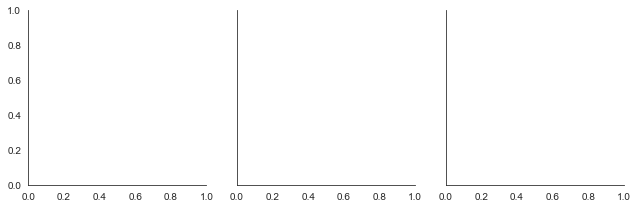

In [13]:
g = sns.FacetGrid(penguins, col='island');

In [14]:
penguins['island'].nunique()

3

In [15]:
type(g)

seaborn.axisgrid.FacetGrid

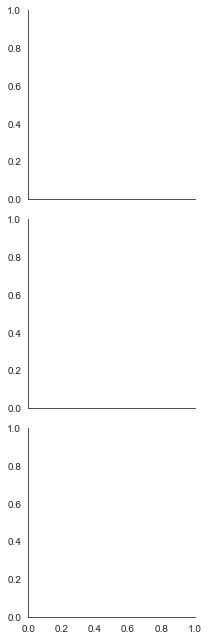

In [16]:
g = sns.FacetGrid(penguins, row='island'); 

### `.map()`

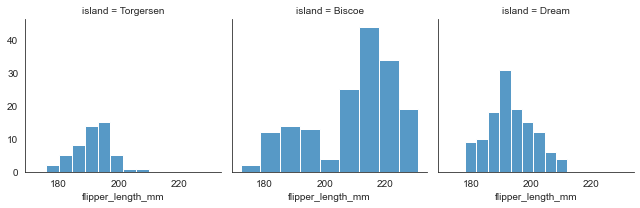

In [17]:
g = sns.FacetGrid(penguins, col='island')
g.map(sns.histplot, "flipper_length_mm"); # what about kde? # can we try to use x = flipper_length_mm?

### `.map_dataframe()`

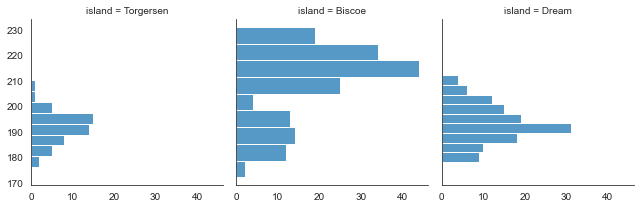

In [18]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm');  # allows for named arguments instead of just positional arguments 

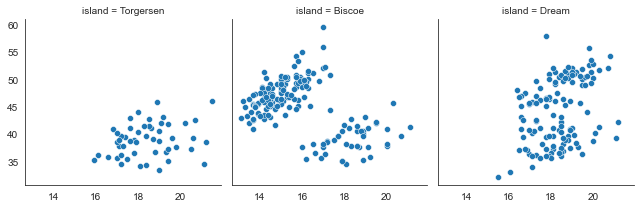

In [19]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm');

## Methods and Attributes

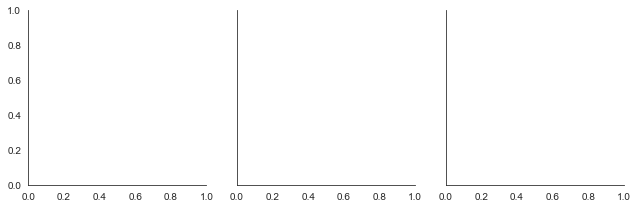

In [20]:
g = sns.FacetGrid(penguins, col='island');

In [28]:
# g. # Hit TAB to see properties and methods   if tab doesn't work for u, try this 

dir(g)  

# to get only user methods - the ones without the underscore 

[m for m in dir(g) if not m.startswith('_')]

['add_legend',
 'ax',
 'axes',
 'axes_dict',
 'col_names',
 'data',
 'despine',
 'facet_axis',
 'facet_data',
 'fig',
 'hue_kws',
 'hue_names',
 'legend',
 'map',
 'map_dataframe',
 'row_names',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels',
 'tight_layout']

In [ ]:
g?

In [29]:
help(g) # the last part contains the methods with description

Help on FacetGrid in module seaborn.axisgrid object:

class FacetGrid(Grid)
 |  FacetGrid(data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
 |  
 |  Multi-plot grid for plotting conditional relationships.
 |  
 |  Method resolution order:
 |      FacetGrid
 |      Grid
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
 |      Initialize the matplotlib figure and FacetGrid object.
 |      
 |   

### `.set_axis_labels()`

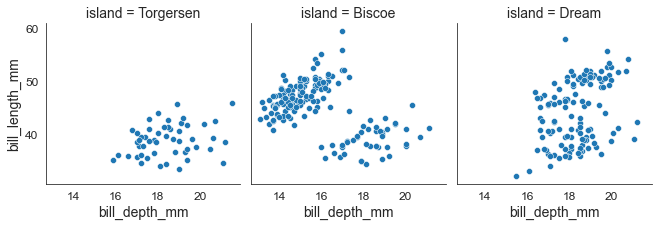

In [61]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm');  # change the x label

**what if we want to a title specific for each plot? let's see..** 

### `.set_titles()`

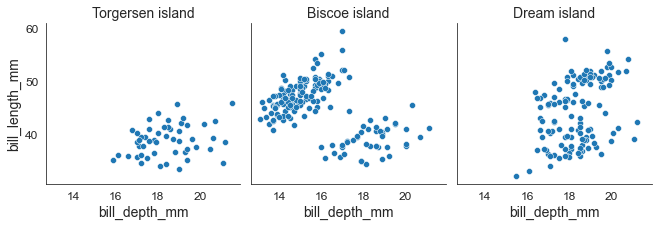

In [63]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm')
g.set_titles(col_template='{col_name} island');  #  change island with another word

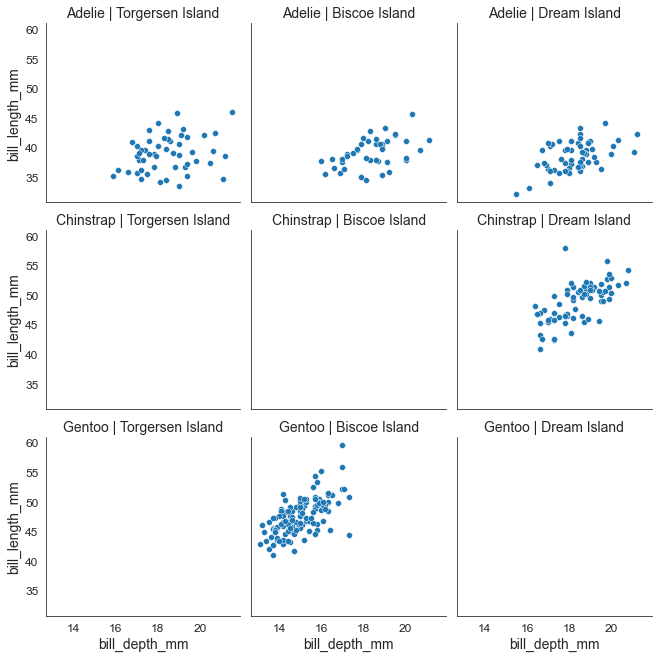

In [65]:
g = sns.FacetGrid(penguins, col='island', row='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}');

why do we have empty plots?  examine the dataset 

### `sharey, ylim`

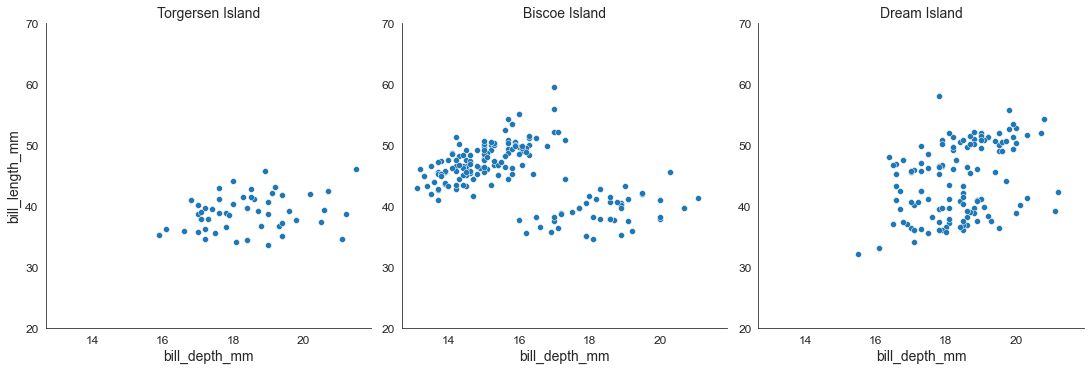

In [34]:
g = sns.FacetGrid(penguins, col='island', sharey=False, height = 5, ylim=(20, 70))  # what if we remove the ylim? misleading?

g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm')
g.set_titles(col_template='{col_name} Island');

## Hue and Custom Functions

### `hue`

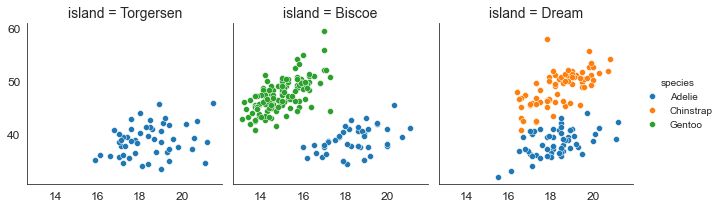

In [35]:
g = sns.FacetGrid(penguins, col='island', hue='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')  # what if we add hue in map method instead?
g.add_legend();

### `palette`

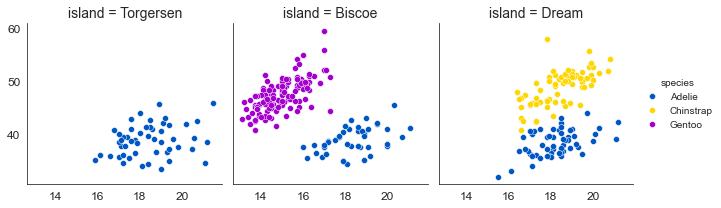

In [36]:
g = sns.FacetGrid(penguins, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm') 
g.add_legend();

### Custom Functions

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

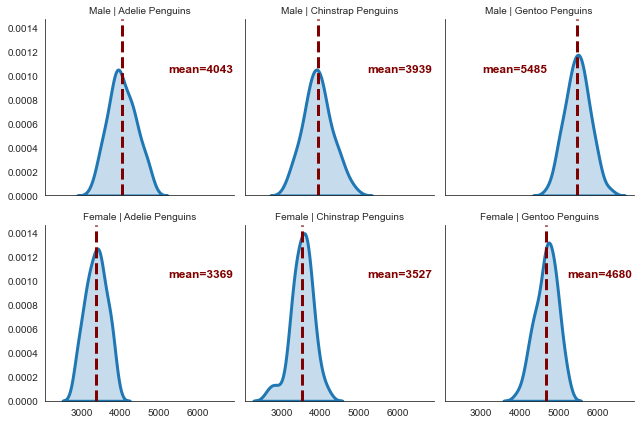

In [43]:
quantity='body_mass_g'  #can we change this variable?

g = sns.FacetGrid(penguins, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
g.map_dataframe(add_mean_line, var=quantity) #map_dataframe accepts any function as long as it has a data argument!
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');

sns.kdeplot()